## Ejercicio: Random Forest para Predicción de Diabetes

El objetivo de este ejercicio es incrementar el accuracy respecto al modelo previo basado en Decision Tree, utilizando ahora un Random Forest Classifier para predecir si un paciente presenta diabetes.

Resultados del modelo (profundidad = 5)
Performance en Test Set

| Métrica       | Valor  |
| ------------- | ------ |
| **Accuracy**  | 0.7792 |
| **F1 Score**  | 0.7018 |
| **Precision** | 0.6667 |
| **Recall**    | 0.7407 |

Performance en Train Set

| Métrica       | Valor  |
| ------------- | ------ |
| **Accuracy**  | 0.8127 |
| **F1 Score**  | 0.7527 |
| **Precision** | 0.6972 |
| **Recall**    | 0.8178 |

Matriz de métricas por Clase en test 

| Clase               | Precision | Recall | F1-Score | Support |
| ------------------- | --------- | ------ | -------- | ------- |
| **No diabetes**     | 0.85      | 0.80   | 0.82     | 100     |
| **Diabetes**        | 0.67      | 0.74   | 0.70     | 54      |
| **Accuracy global** | —         | —      | **0.78** | 154     |
| **Macro avg**       | 0.76      | 0.77   | 0.76     | 154     |
| **Weighted avg**    | 0.79      | 0.78   | 0.78     | 154     |



In [33]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

from sklearn.metrics import mean_squared_error, r2_score

import pickle
from pickle import dump

### Carga de datos del modelo anterior

In [34]:
archivo = "https://breathecode.herokuapp.com/asset/internal-link?id=930&path=diabetes.csv"
df = pd.read_csv(archivo, sep=",")

In [35]:
# Defino X e y igual que en el proyecto original
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# Split igual que el original
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Carga del modelo anterior
with open("modelo_arbol_diabetes.pkl", "rb") as f:
    modelo_cargado = pickle.load(f)

# Validación
modelo_cargado.predict(X_test[:5])

array([0, 0, 0, 0, 1])

In [36]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,84,0,0,0,0.0,0.304,21
618,9,112,82,24,0,28.2,1.282,50
346,1,139,46,19,83,28.7,0.654,22
294,0,161,50,0,0,21.9,0.254,65
231,6,134,80,37,370,46.2,0.238,46


In [37]:
# modelo
# default n_estimators=25
model = RandomForestClassifier(random_state = 42)

# entrenamiento
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [38]:
#Busco los mejores parámetros que puedo aplicar a mi modelo usando GridSearchCV
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [3, 5, 7, None],
    "max_features": ["sqrt", "log2"],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

grid.fit(X_train, y_train)

print("Mejores parámetros:", grid.best_params_)
print("Mejor accuracy CV:", grid.best_score_)


Mejores parámetros: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Mejor accuracy CV: 0.7883113421298147


In [39]:
# Modelo final usando los mejores parámetros encontrados
best_model = grid.best_estimator_

# Entrenamiento
best_model.fit(X_train, y_train)

# Predicciones en test
y_pred = best_model.predict(X_test)

# Métricas
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

print("=== RANDOM FOREST: Test Set ===")
print("Accuracy:", acc)
print("F1 Score:", f1)
print("Precision:", prec)
print("Recall:", rec)

print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))


=== RANDOM FOREST: Test Set ===
Accuracy: 0.7532467532467533
F1 Score: 0.6666666666666666
Precision: 0.6440677966101694
Recall: 0.6909090909090909

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.82      0.79      0.80        99
           1       0.64      0.69      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.74       154
weighted avg       0.76      0.75      0.76       154



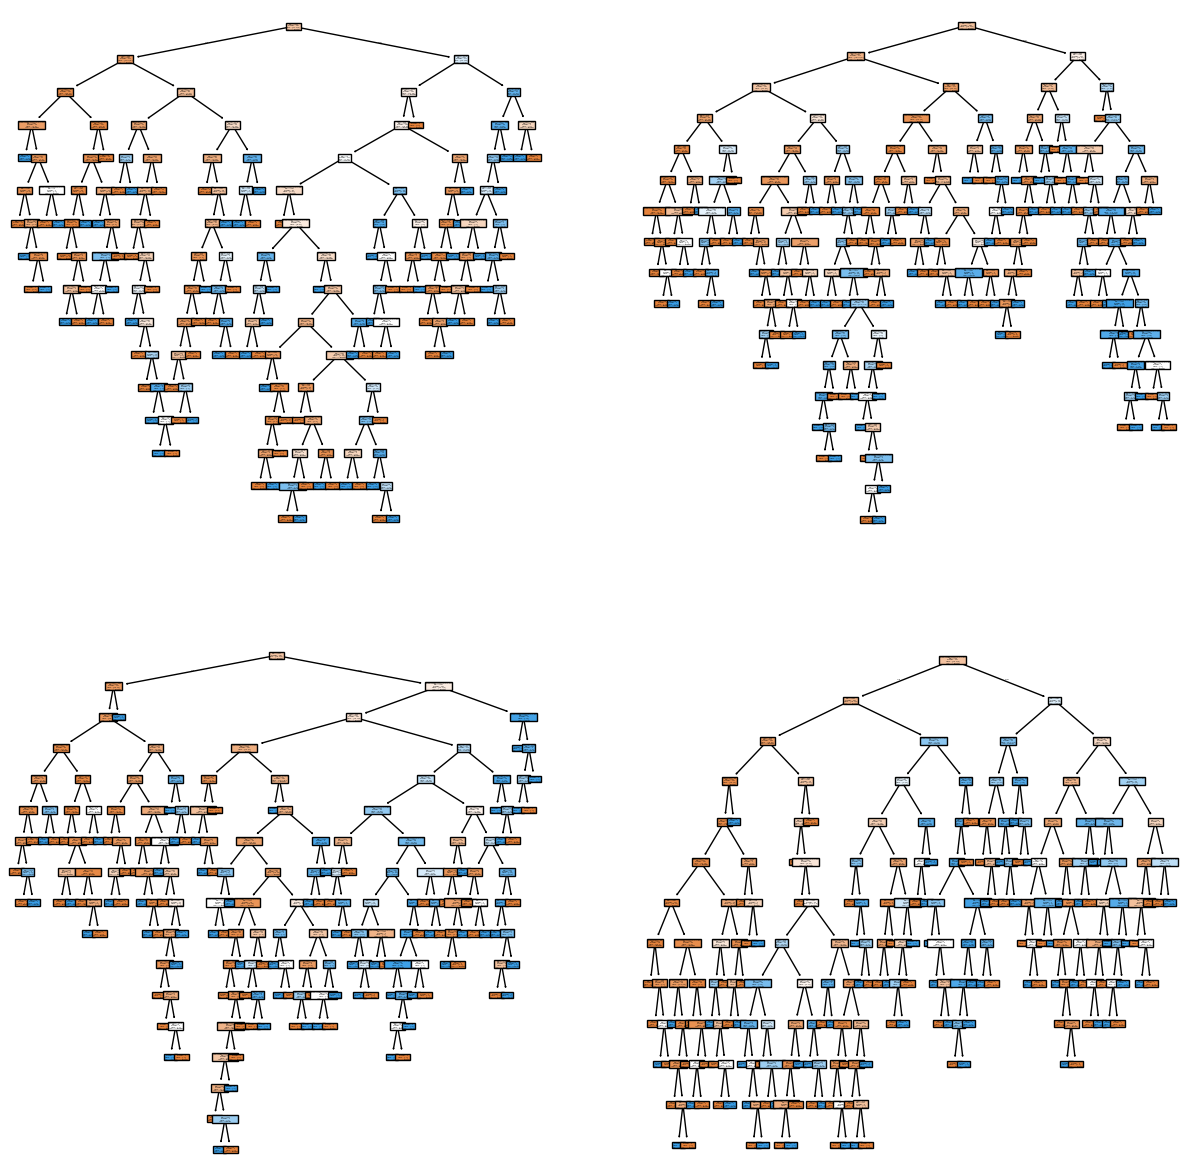

In [40]:
# Visualizamos los 4 primeros árboles de todos los generados

fig, axis = plt.subplots(2, 2, figsize = (15, 15))

clases = ["no diabetes", "Diabetes"]
tree.plot_tree(model.estimators_[10], ax = axis[0, 0], feature_names = list(X_train.columns), class_names = clases, filled = True)
tree.plot_tree(model.estimators_[24], ax = axis[0, 1], feature_names = list(X_train.columns), class_names = clases, filled = True)
tree.plot_tree(model.estimators_[48], ax = axis[1, 0], feature_names = list(X_train.columns), class_names = clases, filled = True)
tree.plot_tree(model.estimators_[30], ax = axis[1, 1], feature_names = list(X_train.columns), class_names = clases, filled = True)

plt.show()

### Conclusión del análisis de este modelo:
| Métrica       | Decision Tree | Random Forest Optimizado |
| ------------- | ------------- | ------------------------ |
| **Accuracy**  | **0.7792**    | 0.7532                   |
| **Precision** | 0.6667        | 0.6441                   |
| **Recall**    | **0.7407**    | 0.6909                   |
| **F1 Score**  | **0.7018**    | 0.6667                   |


Fijándonos sólo en accuracy, el modelo que ofrece un resultado mayor es Decision Tree


In [41]:
# Guardamos el modelo

with open("modelo_randomforest_opt_diabetes.pkl", "wb") as f:
    pickle.dump(best_model, f)
